In [152]:
# -*- coding: utf-8 -*-
"""
This is a simple implementation of DBSCAN intended to explain the algorithm.

@author: Chris McCormick
"""

import numpy

def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # Assign the cluster label to the seed point.
    labels[P] = C
    
    # Look at each neighbor of P (neighbors are referred to as Pn). 
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
       
        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C
        
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched. 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing                
                #NeighborPts = NeighborPts               
        
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from scipy import stats
from sklearn.preprocessing import StandardScaler

boston=load_boston()
x=boston.data
y=boston.target
print(boston.keys())
df=pd.DataFrame(boston.data)
columns=boston.feature_names
df.columns=columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [197]:
print(df_scaled)

[[-0.41771335  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41137448 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [177]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [156]:
#df = df.as_matrix().astype("float32", copy = False)

In [228]:
dbsc = DBSCAN(eps = 0.6, min_samples =5).fit(df_scaled)
#model= MyDBSCAN(df,0.3,5)

In [229]:
print(dbsc)

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)


In [225]:
print(dbsc.labels_.shape)

(506,)


In [226]:
colors=dbsc.labels_

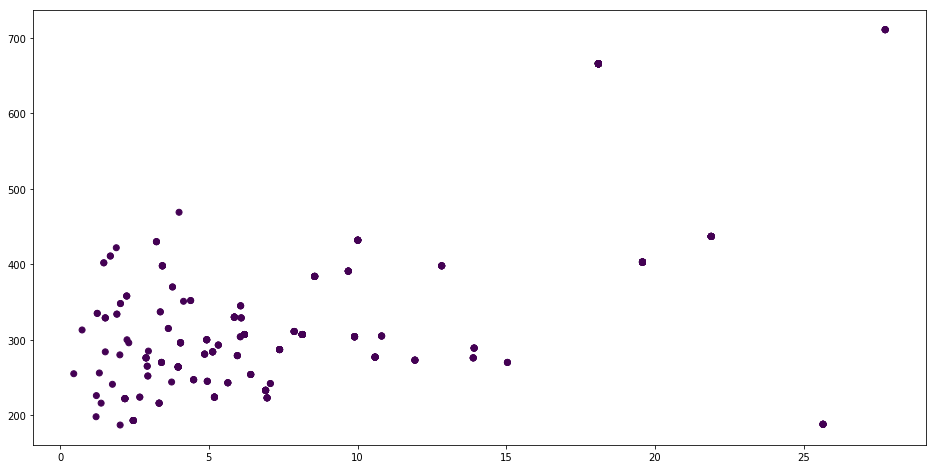

In [230]:
fig=plt.figure(figsize=(16,8))
plt.scatter(df['INDUS'],df['TAX'],c=colors)

In [165]:
print(df[dbsc.labels_==-1])

         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE      DIS   RAD    TAX  \
18    0.80271   0.0   8.14   0.0  0.5380  5.456   36.6   3.7965   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.5380  5.599   85.7   4.4546   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.5380  6.047   88.8   4.4534   4.0  307.0   
32    1.38799   0.0   8.14   0.0  0.5380  5.950   82.0   3.9900   4.0  307.0   
34    1.61282   0.0   8.14   0.0  0.5380  6.096   96.9   3.7598   4.0  307.0   
41    0.12744   0.0   6.91   0.0  0.4480  6.770    2.9   5.7209   3.0  233.0   
42    0.14150   0.0   6.91   0.0  0.4480  6.169    6.6   5.7209   3.0  233.0   
43    0.15936   0.0   6.91   0.0  0.4480  6.211    6.5   5.7209   3.0  233.0   
47    0.22927   0.0   6.91   0.0  0.4480  6.030   85.5   5.6894   3.0  233.0   
48    0.25387   0.0   6.91   0.0  0.4480  5.399   95.3   5.8700   3.0  233.0   
52    0.05360  21.0   5.64   0.0  0.4390  6.511   21.1   6.8147   4.0  243.0   
53    0.04981  21.0   5.64   0.0  0.4390

In [174]:
from collections import Counter
print(Counter(dbsc.labels_))

Counter({-1: 130, 1: 106, 16: 76, 6: 22, 7: 22, 0: 20, 18: 15, 10: 14, 4: 13, 14: 11, 17: 10, 5: 9, 3: 9, 13: 8, 2: 7, 9: 7, 12: 6, 19: 6, 8: 5, 11: 5, 15: 5})
